Importing the necessary Python Libraries and the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\dell\Documents\EDA Dataset\UK_monthly_gdp.csv')
print(data.head())

  Time Period  GDP Growth
0    /01/2020         0.3
1    /02/2020        -0.5
2    /03/2020        -7.0
3    /04/2020       -20.9
4    /05/2020         3.2


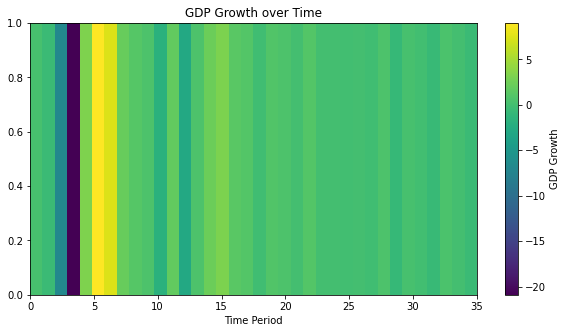

In [2]:
# Data
z = [data['GDP Growth']]
x = data.index
y = ['GDP Growth']

# Create the heatmap
plt.figure(figsize=(10, 5))
plt.imshow(z, cmap='viridis', aspect='auto', extent=[x[0], x[-1], 0, 1])
plt.colorbar(label='GDP Growth')
plt.title('GDP Growth over Time')
plt.xlabel('Time Period')
plt.ylabel('')

# Show the heatmap
plt.show()


As a recession means the decline in the circulation of money for two consecutive quarters, I will convert our monthly data into quarterly data to analyze the recession:

In [3]:
# Convert monthly data to quarterly data using resample method
data['Time Period'] = pd.to_datetime(data['Time Period'], format='/%m/%Y')
data.set_index('Time Period', inplace=True)
quarterly_data = data.resample('Q').mean()
print(quarterly_data.head())

             GDP Growth
Time Period            
2020-03-31    -2.400000
2020-06-30    -2.900000
2020-09-30     3.500000
2020-12-31     0.200000
2021-03-31     0.033333


Calculating and analyzing recession based on quarterly GDP growth:

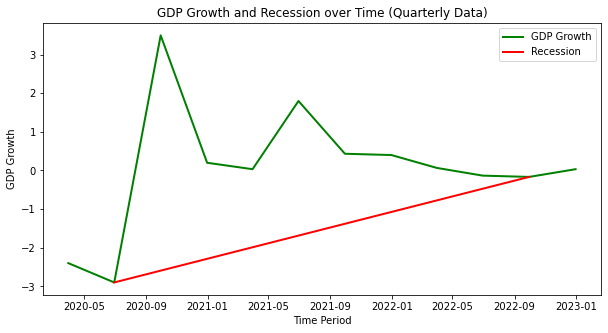

In [4]:
# Calculate recession based on quarterly GDP growth
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))

# Fill missing values with False (since the first quarter cannot be in a recession)
quarterly_data['Recession'].fillna(False, inplace=True)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(quarterly_data.index, quarterly_data['GDP Growth'], label='GDP Growth', color='green', linewidth=2)
plt.plot(quarterly_data[quarterly_data['Recession']].index, quarterly_data[quarterly_data['Recession']]['GDP Growth'], 
         label='Recession', color='red', linewidth=2)

plt.title('GDP Growth and Recession over Time (Quarterly Data)')
plt.xlabel('Time Period')
plt.ylabel('GDP Growth')
plt.legend()

# Show the plot
plt.show()


The red line shows the periods of negative GDP growth (considered recessions), and the green line shows the overall trend in GDP growth over time.

The severity of a recession refers to the extent to which the economy contracts during a recession. A severe recession involves a deeper and more prolonged decline in economic activity, resulting in negative effects on employment, incomes and other economic indicators. Analyzing the severity of the recession:

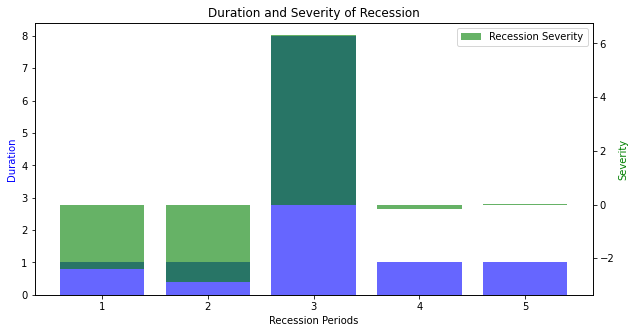

In [6]:


quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()
recession_periods = quarterly_data.groupby('Recession Start')
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP Growth'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.bar(recession_duration.index, recession_duration, color='b', alpha=0.6, label='Recession Duration')
ax2.bar(recession_severity.index, recession_severity, color='g', alpha=0.6, label='Recession Severity')

ax1.set_xlabel('Recession Periods')
ax1.set_ylabel('Duration', color='b')
ax2.set_ylabel('Severity', color='g')

plt.title('Duration and Severity of Recession')
plt.legend(loc='upper right')

# Show the plot
plt.show()


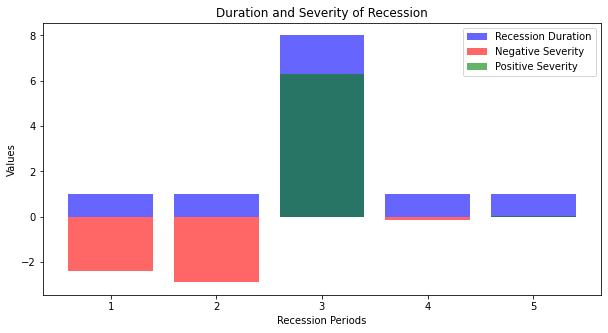

In [10]:


quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()
recession_periods = quarterly_data.groupby('Recession Start')
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP Growth'].sum()

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 5))

negative_severity = recession_severity.copy()
positive_severity = recession_severity.copy()

# Set negative values to 0 in the positive severity and vice versa
positive_severity[positive_severity < 0] = 0
negative_severity[negative_severity > 0] = 0

ax.bar(recession_duration.index, recession_duration, color='b', alpha=0.6, label='Recession Duration')
ax.bar(recession_severity.index, negative_severity, color='r', alpha=0.6, label='Negative Severity')
ax.bar(recession_severity.index, positive_severity, color='g', alpha=0.6, label='Positive Severity')

ax.set_xlabel('Recession Periods')
ax.set_ylabel('Values')

plt.title('Duration and Severity of Recession')
plt.legend(loc='upper right')

# Show the plot
plt.show()
